In [3]:
import pandas as pd
import matplotlib.pyplot as plt


<Axes: xlabel='n_helpers'>

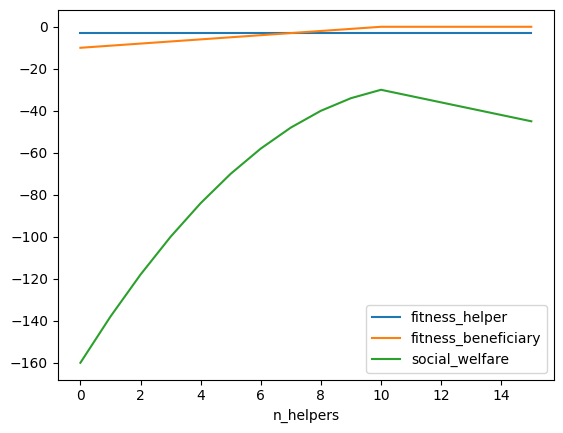

In [23]:
# Create the data
fitness_helper = [-3 for i in range(0, 16)]
fitness_beneficiary = [min(0, -10 + i) for i in range(0, 16)]

# Create the DataFrame
df = pd.DataFrame({
    'fitness_helper': fitness_helper,
    'fitness_beneficiary': fitness_beneficiary
}, index=range(0, 16))



# Rename the index
df.index.name = 'n_helpers'
df.plot()

In [19]:
def plot_lineplot(
    df: pd.DataFrame,
    min_y=None,
    max_y=None,
    title="title",
    xlabel="xlabel",
    ylabel="ylabel",
    label_prefix="",
    label_suffix="",
    legend=True,
    legend_title=None,
    legend_entry_limit=None,
    yline=None,
    xline=None,
):
    fig, ax = plt.subplots(1,1)
    fig.tight_layout()

    ax.plot(
        df,
        linestyle="-",
        linewidth=2,
    )
    if yline != None:
        ax.axhline(y=yline, color="black", linestyle="--")
    if xline != None:
        ax.axvline(x=xline, color="black", linestyle="--")
    if legend:
        ax.legend(
            [
                f"{label_prefix}{str(column).replace('_', ' ')}{label_suffix}"
                for column in df.columns[:legend_entry_limit]
            ],
            draggable=True,
            title=legend_title,
        )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(bottom=min_y, top=max_y)
    ax.grid()
    plt.show()

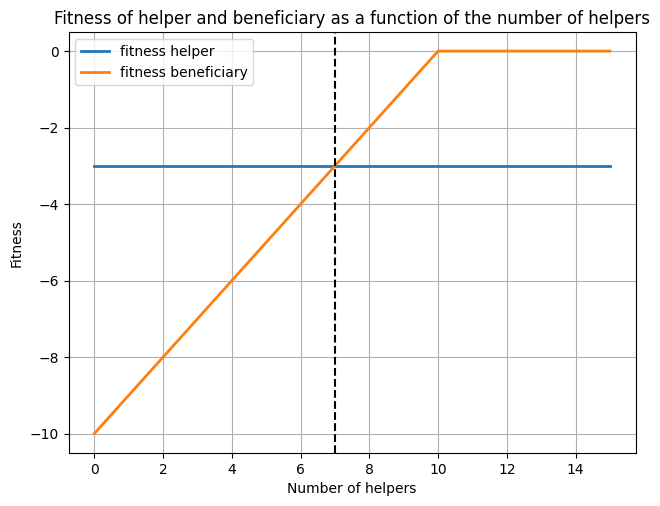

In [20]:
plot_lineplot(df = df,
    min_y=None,
    max_y=None,
    title="Fitness of helper and beneficiary as a function of the number of helpers",
    xlabel="Number of helpers",
    ylabel="Fitness",
    label_prefix="",
    label_suffix="",
    legend=True,
    legend_title=None,
    legend_entry_limit=None,
    yline=None,
    xline=7,)



In [ ]:
df['social_welfare'] = (df['fitness_helper'] * df.index) + (df['fitness_beneficiary'] * (16 - df.index))
df = df.drop(columns=['fitness_helper', 'fitness_beneficiary'])

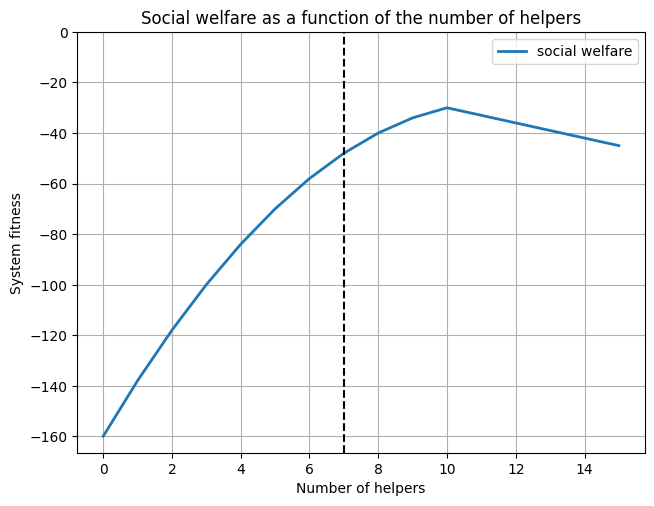

In [28]:

plot_lineplot(df = df,
                  min_y=None,
    max_y=0,
    title="Social welfare as a function of the number of helpers",
    xlabel="Number of helpers",
    ylabel="System fitness",
    label_prefix="",
    label_suffix="",
    legend=True,
    legend_title=None,
    legend_entry_limit=None,
    yline=None,
    xline=7,)